# Introduction


In this report, we walk through the tools and techniques we used in analyzing the photographs from the George M. Ottinger and C.R. Savage collections housed at the University of Utah's J. Willard Marriott Library. Interspersed with the analysis, discussion, and figures, is the actual code used to produce our results. By structuring the report in this way, we hope to show our thought processes and give the reader a better understanding of the machine learning techniques used here.

# Tools Used

When we began work on this project, one of the first decisions we needed to make concerned the tools we would use in exploring the images. Of course, our most integral tool for this analysis was the Marriott Library collections website, where we were able to explore many 
photography collections online.

For the machine learning models, we chose to use the programming language Python, which is the most popular language used for machine learning applications. We also took advantage of the University of Utah's free Google G Suite accounts for students to set up a shared Google Drive with unlimited storage space. Within G Suite, we used Google Colaboratory, a free online Python environment, to write and share code with each other.

## Marriott Library Collections

At the onset of the project, we spent some time looking through all that the collections had to offer. Ultimately, we focused on the collections of the phographers George M. Ottinger (https://collections.lib.utah.edu/search?facet_setname_s=dha_gmo) and C.R. Savage (https://collections.lib.utah.edu/search?facet_setname_s=dha_crscpc).

## Python

Python is the language of choice for most data science and machine learning projects. It is also open-source, meaning anyone can use it free of cost. To do most things in Python, we need to load in libraries. Each Python library contains a set of functions that helps us perform certain tasks. Here, we briefly describe the most important libraries we used.

### NumPy

The library NumPy includes functions allowing for the construction and manipulation of matrices and multi-dimensional arrays in Python. This functionality is very important for us, since images are represented as arrays with pixel values as elements.

### scikit-learn

Scikit-learn is a Python library containing methods that can be used to do a wide variety of data analysis and machine learning. We used three scikit-learn models. One model is based on the idea of dimension reduction, one on clustering, and one on regression. These will be discussed in detail when we show our results.



### Matplotlib

The Matplotlib library contains functions for plotting data. We use Matplotlib methods when we visualize the results of our dimension reduction and clustering analyses.

## Google Colaboratory and Google Drive

Because of the amount of data we were going to be collecting (thousands of photos) and the collaborative nature of our project, we needed a place with plenty of storage space to keep the data and an accessible place to keep the code. The solution for our data was Google Drive, and for our code, Google Colaboratory. Google Colaboratory ("Colab" for short) is a Google product that allows for the writing and execution of code through an internet browser. In its basic form, it is free to use, and has the added benefit that a Colab notebook can "link" to a Google Drive and have access to any data stored in the Drive. By setting up a Shared Drive, we could all access the data and make changes to the code that everyone would see almost instantly. As we got further along into the data processing and analysis, we were using large amounts of memory through Google Colab, which slowed down processing times for us. Thus, we did upgrade to Google Colab Pro towards the end of our time working on the project, which provided our accounts with more memory and longer runtimes.

# Ottinger and Savage Collections

George M. Ottinger and Charles Roscoe Savage were two Utah photographers whose lives and work in Utah overlapped for a period of years in the early 20th century. We chose to focus on photos from these two photographers for two reasons:

1.   The size of the collections (about 2,500 Ottinger photos and about 13,500 Savage photos)
2.   The difference in subject matter between the two photgraphers (mainly landscapes and buildings vs. mainly portraits)



# Obtaining and Understanding the Data

One of the most daunting and time-consuming aspects of the project was the gathering and processing of the data. Thousands of images needed to be downloaded from the collections websites and converted to a form that would be usable with our chosen data analysis tools.

## Scraping Images from Online

Our first major obstacle was getting the data (thousands of images) off the collections websites and into a usable format. The sheer volume of images we needed to download made it impossible to do by hand, i.e., clicking on each image and pressing "download." Instead, we wrote a script in Python that would "scrape" the data for us. By using web scraping, we could simply run a script from our computers that would continually access the collections webpages and download images one by one, without us having to interact with the pages ourselves. This technique is commonly used to obtain large amounts of data that is freely available online, but that would be infeasible to download by hand.

## Converting Images to Usable Format

From the collections websites, the photos are downloaded as JPEG images. To analyze the photos, we needed to convert them to a format that is easily manipulated within Python, and that is compatible with the methods in scikit-learn -- that meant we needed them to be NumPy arrays. Since an image is made up of a grid of pixels, where the value at each pixel determines the color, an image can be thought of simply as a matrix (black and white image) or a 3D array (color image, where the third dimension arises from the three RGB color channels). Luckily, Python has a library that makes it simple to convert a JPEG image to a NumPy array. The scikit-image library contains methods that are useful for doing image processing and analysis with scikit-learn. If the image is stored in our Google Drive as image.jpg, the following line of code reads in the image and converts it to a NumPy array called image_array:
```
image_array = io.imread("image.jpg")
```
After converting the images to NumPy arrays, we still had to address two problems:

1.   The photos were all different sizes. 
2.   Although most photos were in black and white, some were in color (or had been tinted).

To use the machine learning methods provided by scikit-learn, each photo needed to have exactly the same number of pixels. This was fixed easily by rescaling the image after loading it. We chose to make each image 100x100 pixels. 
```
image_array = resize(io.imread("image.jpg"),(100,100))
``` 
Next, we had to take care of the color photos. While black and white images are represented by 2D arrays, i.e., matrices, color images are represented by 3D arrays. The third dimension arises because of the RGB representation for colors. Each pixel we see in a color image is actually a sum of three color components -- one red, one blue, and one green. To address this issue, we simply made sure color images were converted to black and white before we did any analysis using the ```rgb2gray``` function:
```
image_array = resize(rgb2gray(io.imread("image.jpg")),(100,100))
```
The above line of code now accesses the JPEG file image.jpg, converts it to a NumPy array, converts it to black and white (if it was a color image), and finally, resizes to 100 pixels by 100 pixels. By looping through all the images in our Drive and applying the same methods to each, we converted thousands of JPEG images to thousands of 100x100 NumPy arrays. To use the methods in scikit-learn, we needed to format all this data in a special way. The input to most scikit-learn functions is a large array $X$ where each row of $X$ contains all the characteristics for a certain sample. For us, this means that each row of $X$ should represent a single photo, where the columns are filled with the pixel values for that photo. Thus, the number of rows of $X$ is equal to the number of photos we have, and the number of columns of $X$ is equal to the number of pixels in each image, so $100\times 100 = 10,\hspace{-2pt}000$ pixels. The below code snippet shows how we set up this array and fill it with the image data, where ```num_images``` is the number of images we have and ```file_list``` is a list of the photo file names:
```
X = np.zeros((num_images,100*100))
for i, filename in enumerate(file_list,start=1):
    image_array = io.imread(f'drive/Shared drives/Images/{filename}')
    image_array = resize(rgb2gray(image_array),(100,100))
    X[i,:] = np.reshape(image_array,100*100)
```

Notice that the first and second lines of the for loop apply the same sequence of functions we just talked about for preprocessing the images. The third line simply takes the resulting $100\times 100$ matrix and "stretches" it out to a $1\times 10000$ matrix, then inserts it as a row of $X$. 

With this large array $X$ containing all our image data, we are finally ready to perform analyses! 

## Loading Libraries

Before we actually run any code, we need to import some Python libraries. These libraries contain functions that help us load and transform data, apply different machine learning algorithms, and visualize our results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io 
from natsort import natsorted, ns 
import random
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Mounting Drive and Loading Data

In our Google Drive, we have already stored the NumPy arrays containing the Ottinger and Savage image data. To save time, we do not want to reload and preprocess all the images each time we wish to do analysis. So, after obtaining the arrays ```OTT_array``` and ```SAV_array```, we saved the preprocessed data as follows:
```
np.save('drive/Shared drives/LibraryProjectImages/Ott.npy', OTT_array)
np.save('drive/Shared drives/LibraryProjectImages/Sav.npy', SAV_array)
```
This means next time we want to look at the preprocessed data, we can simply load in the two NumPy arrays Ott.npy and Sav.npy.

The next two lines of code connect our Drive to this Google Colaboratory notebook so we can access the data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we use the ```np.load``` function to load in the data contained in the two numpy arrays Ott.npy and Sav.npy. The ```np.vstack``` function stacks the two arrays one on top of the other, so we are ready to use scikit-learn functions. We also save the number of rows in ```Ott.npy``` and ```Sav.npy```, which tell us the number of Ottinger samples and the number of Savage samples, respectively.

In [3]:
OTT_array = np.load('drive/Shared drives/Images/Ott.npy')
SAV_array = np.load('drive/Shared drives/Images/Sav.npy')
X = np.vstack((SAV_array,OTT_array))
num_ott = np.size(OTT_array,0)
num_sav = np.size(SAV_array,0)

For some of our analysis, we will want to label the samples as either being Ottinger or Savage. Rather than use the photographers' names for the labels, we will simply label the Ottinger photos with $0$ and the Savage photos with $1$. The code below constructs a vector (or 1D matrix) $y$ with the $0$ and $1$ labels. The elements in $y$ correspond to the rows of $X$. For example, the 60th row of $X$ is a Savage sample, so the 60th element of $y$ is $1$. The 14000th row of $X$ is an Ottinger sample, so the 14000th element of $y$ is $0$.

In [4]:
y=np.zeros(num_sav+num_ott)
y[:num_sav]=1

With the data loaded, we are ready to dive in to some machine learning algorithms!

# Machine Learning

## K-Means

K-Means is a clustering algorithm, meaning that it takes a data set and "clusters" the data points into different groups, where members of each cluster are "close" to each other in some sense.

The user specifies $k$, the number of clusters they are looking for. In our case, we want to separate the photos by photographer, so we set $k=2$. There are essentially three steps to the algorithm:

1.   Choose $k$ samples from the data set to be the initial centroids of the $k$ clusters.
2.   Assign each of the other samples to the appropriate cluster by seeing which of the $k$ centroids it is closest to.
3. For each cluster, assign a new centroid by taking the mean of all samples in that cluster.

Steps 2 and 3 repeat until the clusters are sufficiently stable (i.e., the difference between the old and new centroids is smaller than a certain threshold value). For a more thorough description of the K-Means algorithm, refer to https://scikit-learn.org/stable/modules/clustering.html#k-means.

The line of code below creates a K-Means model for our data. The parameter ```n_clusters``` is the number of clusters, which for us is 2 because we are comparing two photographers. The ```random_state``` parameter allows us to guarantee that someone else could run our code with the same data at another time or on another computer and get the exact same output. Without setting ```random_state```, we would expect small differences due to randomness on each run. 

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

After the model is created, we can extract the cluster labels. The labels here are $0$'s and $1$'s, just like our true labels for the samples. After visually exploring the clusters, we can do a quantitative comparison of the true labels and the predicted labels to see how well the K-Means model did in representing our data.

In [6]:
labels = kmeans.predict(X)

Let $N$ be the total number of samples. The K-Means model transforms the $N\times 10000$ array $X$ to an $N\times 2$ array where each row represents one sample (the same sample as the corresponding row in $X$), and the 2 columns contain $x$- and $y$-values that show where the sample ended up in the clustering. The line below extracts those $(x,y)$-pairs.

In [7]:
pts = kmeans.transform(X)

By plotting the $(x,y)$-pairs for each sample and coloring the points by photographer, we can see the clustering results. Below, the Savage samples are shown in red and the Ottinger samples in blue. We first show the two clusters separately, and then superimposed.

(0.0, 75.0)

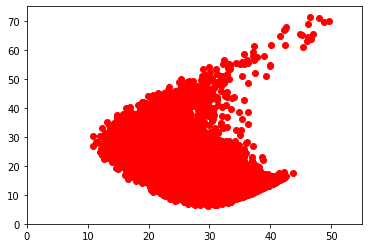

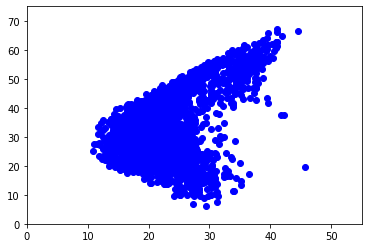

In [8]:
plt.figure()
plt.scatter(pts[:num_sav,0],pts[:num_sav,1],color='red')
plt.xlim([0,55])
plt.ylim([0,75])
plt.figure()
plt.scatter(pts[num_sav:,0],pts[num_sav:,1],color='blue')
plt.xlim([0,55])
plt.ylim([0,75])

(0.0, 75.0)

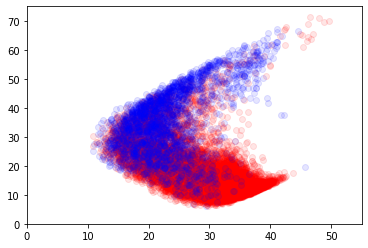

In [9]:
plt.scatter(pts[:num_sav,0],pts[:num_sav,1],color='red',alpha=0.1)
plt.scatter(pts[num_sav:,0],pts[num_sav:,1],color='blue',alpha=0.1)
plt.xlim([0,55])
plt.ylim([0,75])

It looks like K-Means did a fair job of separating the samples from the two photographers. There is some overlap between the two, but there are also regions that contain only Savage or only Ottinger samples.

Next, we plot the same data points, but this time colored by cluster label. Below, the pink and orange points show the two different clusters constructed by our K-Means model. Again, we show the two clusters separately at first, and then superimposed. 

(0.0, 75.0)

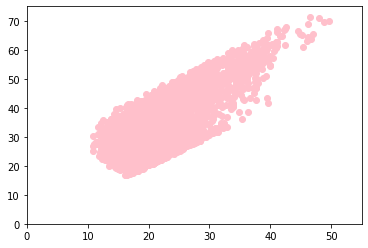

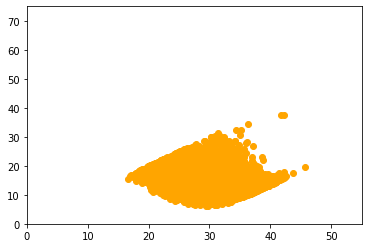

In [10]:
ind0 = np.where(labels==0)
ind1 = np.where(labels==1)
plt.figure()
plt.scatter(pts[ind0,0],pts[ind0,1],color='pink')
plt.xlim([0,55])
plt.ylim([0,75])
plt.figure()
plt.scatter(pts[ind1,0],pts[ind1,1],color='orange')
plt.xlim([0,55])
plt.ylim([0,75])

(0.0, 75.0)

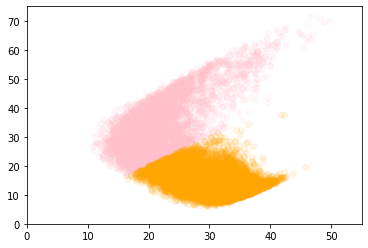

In [11]:
plt.figure()
plt.scatter(pts[ind0,0],pts[ind0,1],color='pink',alpha=0.1)
plt.scatter(pts[ind1,0],pts[ind1,1],color='orange',alpha=0.1)
plt.xlim([0,55])
plt.ylim([0,75])

By just looking at the plots, we can see that the pink cluster contains mostly Ottinger photos and the orange cluster mostly Savage photos. The labels for the pink and orange clusters are $0$ and $1$, respectively, corresponding to our chosen Ottinger and Savage labels. Therefore, we can measure how well the model did in separating the two photographers' samples by seeing how many times the cluster label matches the true label. The code below computes the percentage of correct labels. 

In [12]:
1-np.count_nonzero(labels-y)/(num_ott+num_sav)

0.8445380793660776

K-Means correctly classifies the images with an accuracy of 84.5%, which is not much higher than naively guessing Savage on each photo (84.2%). However, there is still more to be learned by looking at the images that were misclassified by K-Means. 

First, we will examine Savage photos that have been incorrectly classified as Ottinger photos. In the very first plot above (the red points showing the K-Means output for the Savage photos), we will focus on the group of points in the upper right. These points were grouped into the pink cluster (Ottinger). We might expect them to differ from Savage's other photos in such a way that the algorithm confused them as being taken by a different photographer.

The below code extracts these specific Savage samples and shows them.

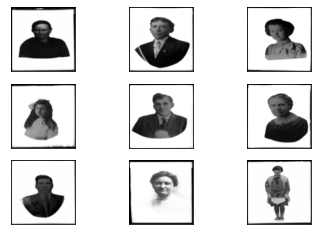

In [13]:
mc = np.where(pts[:num_sav,0] > 46)
for i in range(np.size(mc)):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(SAV_array[mc[0][i],:],(100,100)),cmap='gray')
plt.show()

These photos definitely share similar features. We see that they are all portraits placed on white backgrounds. Are they representative of Savage's usual photography?

Below, we take a look at 25 random samples from the Savage collection.

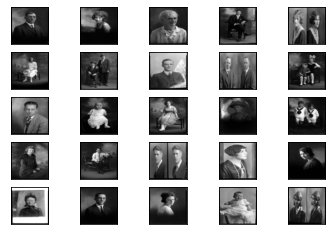

In [14]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(SAV_array[np.random.randint(num_sav),:],(100,100)),cmap='gray')
plt.show()

Notice that Savage's photos are mostly portraits taken in a studio. The artificial white background portraits do not fit in with his other works, so the clustering algorithm did not place them close to his other samples.

Now, we will do the same analysis, but for Ottinger photos that were incorrectly classified as being taken by Savage. In the second plot (the blue points showing the K-Means output for the Ottinger photos), we focus on the group of points in the lower right. These points were grouped into the orange cluster (Savage). Do they differ significantly from Ottinger's other photos? Below, we extract and show 12 of the misclassified photos.

(array([ 186,  187,  190,  360,  596,  598, 1010, 1271, 1647, 1728, 2414,
       2500]),)


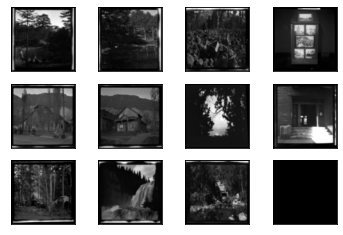

In [15]:
mc2 = np.where((pts[num_sav:,0] > 33) & (pts[num_sav:,1] < 30))
print(mc2)
for i in range(np.size(mc2)):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(OTT_array[mc2[0][i],:],(100,100)),cmap='gray')
plt.show()

These photos are very dark, which is more common for indoor studio portrait photography than for outdoor landscape photography. This may help explain why K-Means put these specific photos into the Savage cluster.

Below, we show a random sample of 25 Ottinger photos.

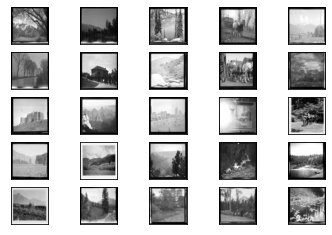

In [16]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(OTT_array[np.random.randint(num_ott),:],(100,100)),cmap='gray')
plt.show()

So we see that Ottinger's photos mainly show landscapes and buildings in bright outdoor light, while his photos that were misclassified are darker.

Clustering models like K-Means are very useful when you have data without labels and want to split them into a number of categories. Say we somehow got the Savage and Ottinger photos all mixed up and lost track of the original labels -- K-Means could help us separate the photos by photographer, but would lead to some mistakes, as shown.

## t-SNE

K-Means is not, of course, the only algorithm that could help us distinguish between these two photographers. A more recent and advanced algorithm, t-distributed stochastic neighbor embedding (or t-SNE), similarly takes the thousands of data points for each pixel and reduces them to two coordinate points so they can easily be viewed in 2D. Unlike K-Means, though, t-SNE does not actually label any final clusters -- it is mainly for easy visualization. It is a dimension reduction technique that lets us "see" high-dimensional data in only 2D (or 3D, although we do not show that here). Its inner workings are much more complicated to explain than the simpler algorithm behind K-Means, so we refer to https://scikit-learn.org/stable/modules/manifold.html#t-sne for details. However, we will mention that it is recommended to use a second dimension reduction technique, principal component analysis, or PCA, to reduce the dimension to a more reasonable size before applying t-SNE directly to very high-dimensional data. For details about PCA, see https://scikit-learn.org/stable/modules/decomposition.html#pca.

Below, we first apply PCA to reduce the dimension from 10000 (the number of pixels in each image) to 50. 

In [17]:
pca = PCA(n_components=50)
Xnew=pca.fit_transform(X)

We then apply t-SNE to the output of PCA, and by setting ```n_components=2```, obtain 2D data that can be plotted.

In [18]:
tsne = TSNE(n_components=2).fit_transform(Xnew)

Here, we again plot the Savage points in red and the Ottinger points in blue. We show the two sets of samples separately first, and then superimposed.

(-80.0, 90.0)

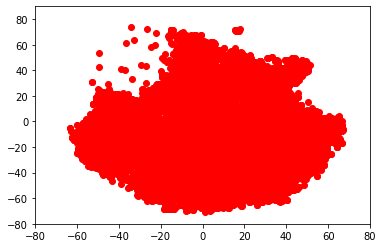

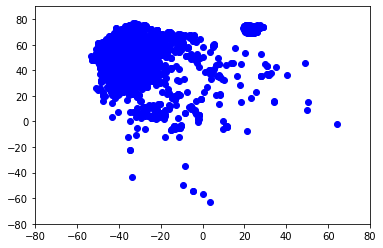

In [19]:
plt.figure()
plt.scatter(tsne[:num_sav,0],tsne[:num_sav,1],color='red')
plt.xlim([-80,80])
plt.ylim([-80,90])
plt.figure()
plt.scatter(tsne[num_sav:,0],tsne[num_sav:,1],color='blue')
plt.xlim([-80,80])
plt.ylim([-80,90])

(-80.0, 90.0)

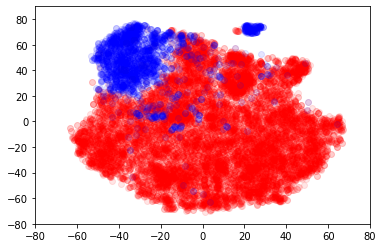

In [20]:
plt.figure()
plt.scatter(tsne[:num_sav,0],tsne[:num_sav,1],color='red',alpha=0.1)
plt.scatter(tsne[num_sav:,0],tsne[num_sav:,1],color='blue',alpha=0.1)
plt.xlim([-80,80])
plt.ylim([-80,90])

We see that t-SNE appears to be fairly successful in separating the samples by photographer. Again, since t-SNE is for visualization and does not assign cluster labels, we do not have a success rate to compute here.

## Logistic Regression

A logistic regression model is for binary classification, meaning classification into two groups. Since that is exactly what we are doing with the Ottinger and Savage photos, we expected this model to perform well. A major difference between this model and a clustering model like K-Means is that the logistic regression model requires the true labels as input. The true labels were unnecessary for a K-Means model, but were useful to us in evaluating the accuracy of the model after it was created. A logistic regression model cannot be created for data without labels, so would be unusable in, say, our imagined situation where the photos were all mixed up and information about photographers had been lost. On the other hand, say we trained a logistic regression model on the labeled Ottinger and Savage collections, then found a set of photos that were known to have been taken by either Savage or Ottinger. This model could help researchers make a more educated guess as to the true photographer of each photo. To recreate a situation like this, we will split our data into "train" and "test" sets. The train set is used to create the logistic regression model. Then the model's accuracy is tested on the test set. For details on this type of regression model, see https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression.

As a first step, we use the ```train_test_split``` function to randomly assign 80% of the samples to the train set and 20% to the test set.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Next, we use the training data ```X_train``` and the true labels for the training data ```y_train``` to create the model.

In [22]:
clf = LogisticRegression(random_state=1,solver='sag',max_iter=1000,tol=1e-3).fit(X_train,y_train)

Finally, we feed the test data into the model and use the ```score``` function to see how well the model predicts the true labels.

In [23]:
clf.score(X_test,y_test)

0.9833385727758567

The logistic regression model is highly accurate for this data set.